In [1]:
%matplotlib inline

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
plt.style.use('ggplot')

In [2]:
namelist = ['name','timestamp','count']
oo = pd.read_csv('~/projects/uatu/uatu.csv', index_col=False,names=namelist)

In [3]:
df2 = oo.fillna(0)

In [4]:
names = oo['name'].unique()

In [5]:
names

array(['camera_1', 'camera_2', 'camera_3', 'camera_4', 'camera_5',
       'camera_6', 'camera_7', 'camera_8', 'camera_9', 'camera_10',
       'camera_11', 'camera_12', 'camera_13', 'camera_14', 'camera_15',
       'camera_16', 'camera_17', 'camera_18', 'camera_19', 'camera_20',
       'camera_21', 'camera_22', 'camera_23', 'camera_24'], dtype=object)

In [6]:
oo.reset_index()
grouped = oo.groupby('name').max()
grouped

,timestamp,count
name,,
camera_1,1.579832e+09,NaN
camera_10,1.579832e+09,NaN
camera_11,1.579832e+09,2.0
camera_12,1.579832e+09,0.0
camera_13,1.579832e+09,4.0
camera_14,1.579832e+09,7.0
camera_15,1.579832e+09,8.0
camera_16,1.579832e+09,9.0
camera_17,1.579832e+09,9.0


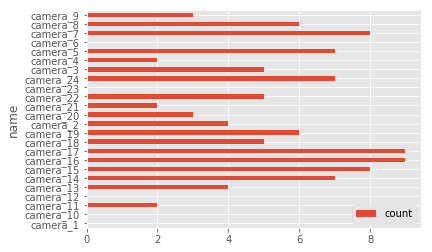

In [7]:
sorted_by_camera = grouped.sort_values('name', )
sorted_by_camera.plot(y='count', kind='barh')

/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


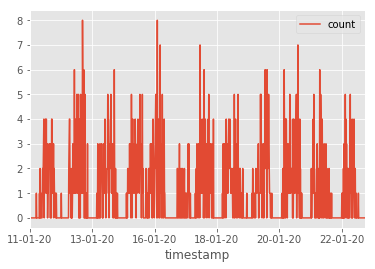

In [8]:
oo2 = oo.dropna()
oo2['timestamp'] = oo2['timestamp'].apply(lambda t: time.strftime("%d-%m-%y", time.localtime(int(t))))
oo2[(oo2.name == 'camera_7')].plot(x='timestamp', y='count',kind='line')

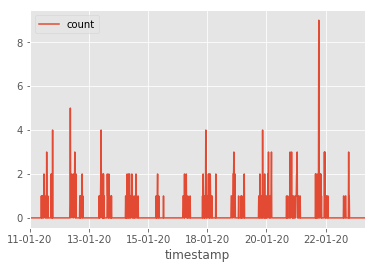

In [12]:
oo2[(oo2.name == 'camera_17')].plot(x='timestamp', y='count',kind='line')

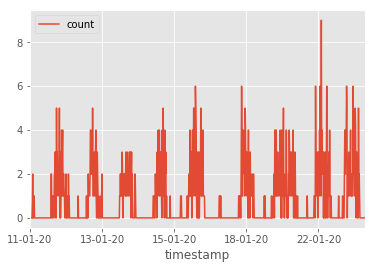

In [13]:
oo2[(oo2.name == 'camera_16')].plot(x='timestamp', y='count',kind='line')